## load the dependencies

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import joblib

## load the data

In [26]:
df = pd.read_csv('Datasets/winequality.csv')

## check data's head, tail, null values, duplicate values, info and statistics

In [27]:

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
df.shape

(1599, 12)

In [29]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [32]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
df.duplicated().any()

True

In [34]:
df.duplicated().sum()

240

In [35]:
df = df.drop_duplicates()

In [36]:
df.duplicated().sum()


0

In [37]:
df.shape

(1359, 12)

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


## bivariate analysis

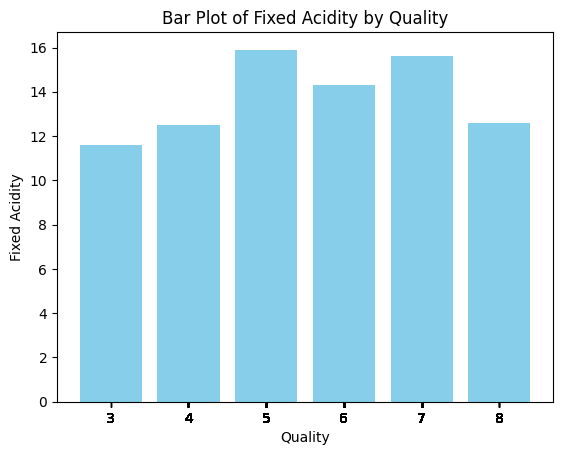

In [39]:
x = df['quality']
y = df['fixed acidity']

# Create a bar plot
#plt.figure(figsize=(8, 6))
plt.bar(x, y, color='skyblue')  # Adjust color as needed
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.title('Bar Plot of Fixed Acidity by Quality')
plt.xticks(x)  # Ensure x-ticks are properly set
#plt.grid(True, axis='y')  # Add gridlines on y-axis
plt.show()

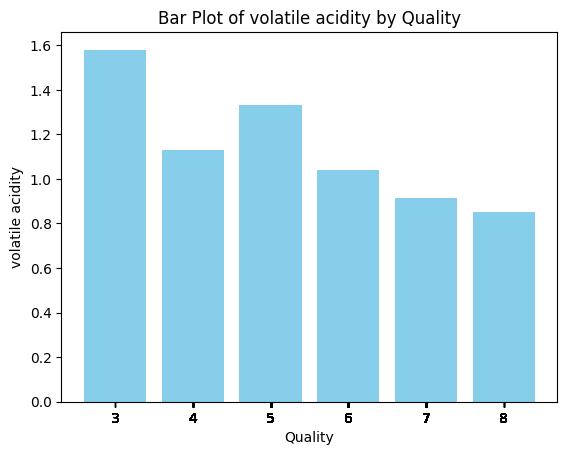

In [40]:
x = df['quality']
y = df['volatile acidity']

# Create a bar plot
#plt.figure(figsize=(8, 6))
plt.bar(x, y, color='skyblue')  # Adjust color as needed
plt.xlabel('Quality')
plt.ylabel('volatile acidity')
plt.title('Bar Plot of volatile acidity by Quality')
plt.xticks(x)  # Ensure x-ticks are properly set
#plt.grid(True, axis='y')  # Add gridlines on y-axis
plt.show()

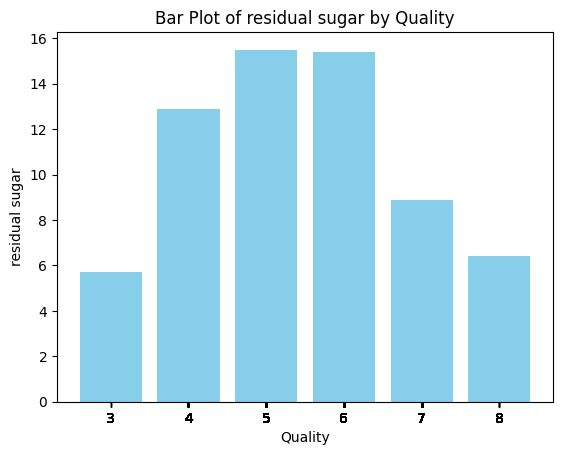

In [41]:
x = df['quality']
y = df['residual sugar']

# Create a bar plot
#plt.figure(figsize=(8, 6))
plt.bar(x, y, color='skyblue')  # Adjust color as needed
plt.xlabel('Quality')
plt.ylabel('residual sugar')
plt.title('Bar Plot of residual sugar by Quality')
plt.xticks(x)  # Ensure x-ticks are properly set
#plt.grid(True, axis='y')  # Add gridlines on y-axis
plt.show()

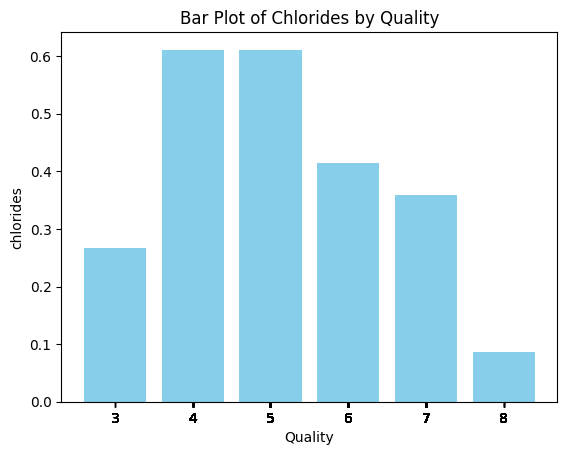

In [42]:
x = df['quality']
y = df['chlorides']

# Create a bar plot
#plt.figure(figsize=(8, 6))
plt.bar(x, y, color='skyblue')  # Adjust color as needed
plt.xlabel('Quality')
plt.ylabel('chlorides')
plt.title('Bar Plot of Chlorides by Quality')
plt.xticks(x)  # Ensure x-ticks are properly set
#plt.grid(True, axis='y')  # Add gridlines on y-axis
plt.show()

<Axes: >

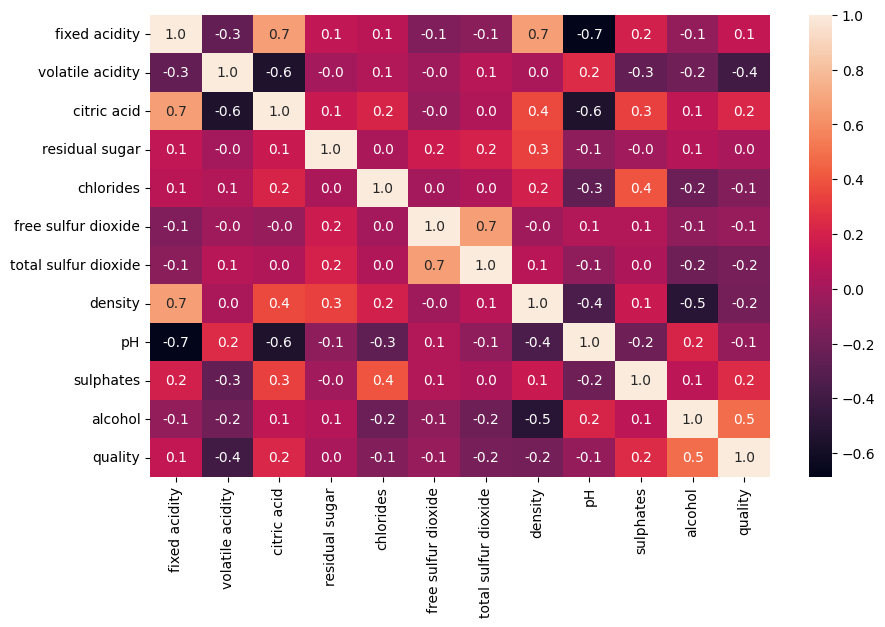

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='0.1f')

## bining the target variable

In [44]:
df.quality.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [45]:
df['quality'] = [1 if x>=7 else 0 for x in df['quality']]

In [46]:
df.quality.value_counts()


quality
0    1175
1     184
Name: count, dtype: int64

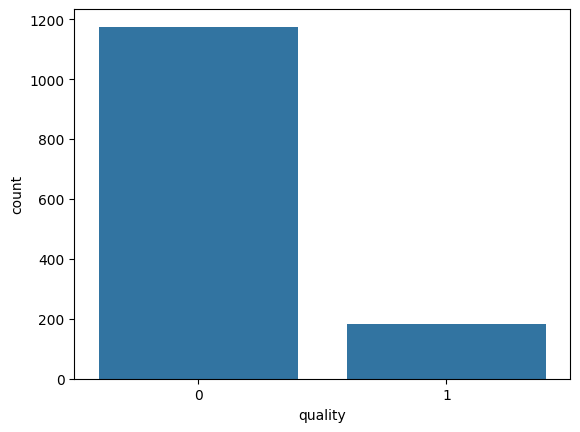

In [47]:
sns.countplot(data=df, x='quality')
plt.show()

## split datasets into x metrics and y series


In [49]:
X = df.drop('quality', axis=1)
y = df['quality']

## handling imbalanced datasets

In [50]:
X_res , y_res = SMOTE().fit_resample(X, y)

In [51]:
y_res.value_counts()

quality
0    1175
1    1175
Name: count, dtype: int64

## spliting datasets into training and test

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=43)

## Features scaling

In [53]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## PCA 

In [54]:
pca = PCA(n_components=0.90)

In [55]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [56]:
pca.explained_variance_ratio_

array([0.28941739, 0.1859092 , 0.15128384, 0.1007117 , 0.0838701 ,
       0.06024132, 0.04696895])

In [57]:
sum(pca.explained_variance_ratio_)


0.918402499672294

## Models

In [58]:
log = LogisticRegression()
log.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)



y_pred1 = log.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = svm.predict(X_test)
y_pred4 = rfc.predict(X_test)
y_pred5 = dtc.predict(X_test)
y_pred6 = gbc.predict(X_test)

s1_1 = accuracy_score(y_test, y_pred1)
s1_2 = precision_score(y_test, y_pred1)
s1_3 = recall_score(y_test, y_pred1)
s1_4 = f1_score(y_test, y_pred1)

s2_1 = accuracy_score(y_test, y_pred2)
s2_2 = precision_score(y_test, y_pred2)
s2_3 = recall_score(y_test, y_pred2)
s2_4 = f1_score(y_test, y_pred2)

s3_1 = accuracy_score(y_test, y_pred3)
s3_2 = precision_score(y_test, y_pred3)
s3_3 = recall_score(y_test, y_pred3)
s3_4 = f1_score(y_test, y_pred3)

s4_1 = accuracy_score(y_test, y_pred4)
s4_2 = precision_score(y_test, y_pred4)
s4_3 = recall_score(y_test, y_pred4)
s4_4 = f1_score(y_test, y_pred4)

s5_1 = accuracy_score(y_test, y_pred5)
s5_2 = precision_score(y_test, y_pred5)
s5_3 = recall_score(y_test, y_pred5)
s5_4 = f1_score(y_test, y_pred5)

s6_1 = accuracy_score(y_test, y_pred6)
s6_2 = precision_score(y_test, y_pred6)
s6_3 = recall_score(y_test, y_pred6)
s6_4 = f1_score(y_test, y_pred6)

print(s1_1, s1_2, s1_3, s1_4, s2_1, s2_2, s2_3, s2_4, s3_1, s3_2, s3_3, s3_4, s4_1, s4_2, s4_3, s4_4, s5_1, s5_2, s5_3, s5_4, s6_1, s6_2, s6_3, s6_4)

0.8212765957446808 0.8185185185185185 0.86328125 0.8403041825095057 0.8978723404255319 0.8537414965986394 0.98046875 0.9127272727272727 0.8595744680851064 0.8467153284671532 0.90625 0.8754716981132076 0.9 0.8827838827838828 0.94140625 0.9111531190926276 0.8808510638297873 0.8846153846153846 0.8984375 0.8914728682170543 0.8787234042553191 0.8566308243727598 0.93359375 0.8934579439252337


In [59]:
# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Dictionary to store the results
results = []

# Fit the models and make predictions
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create DataFrame from the results
final_data = pd.DataFrame(results)

# Display the final DataFrame
print(final_data)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.821277   0.818519  0.863281  0.840304
1                  KNN  0.897872   0.853741  0.980469  0.912727
2                  SVM  0.859574   0.846715  0.906250  0.875472
3        Random Forest  0.910638   0.890511  0.953125  0.920755
4        Decision Tree  0.868085   0.870229  0.890625  0.880309
5    Gradient Boosting  0.878723   0.856631  0.933594  0.893458


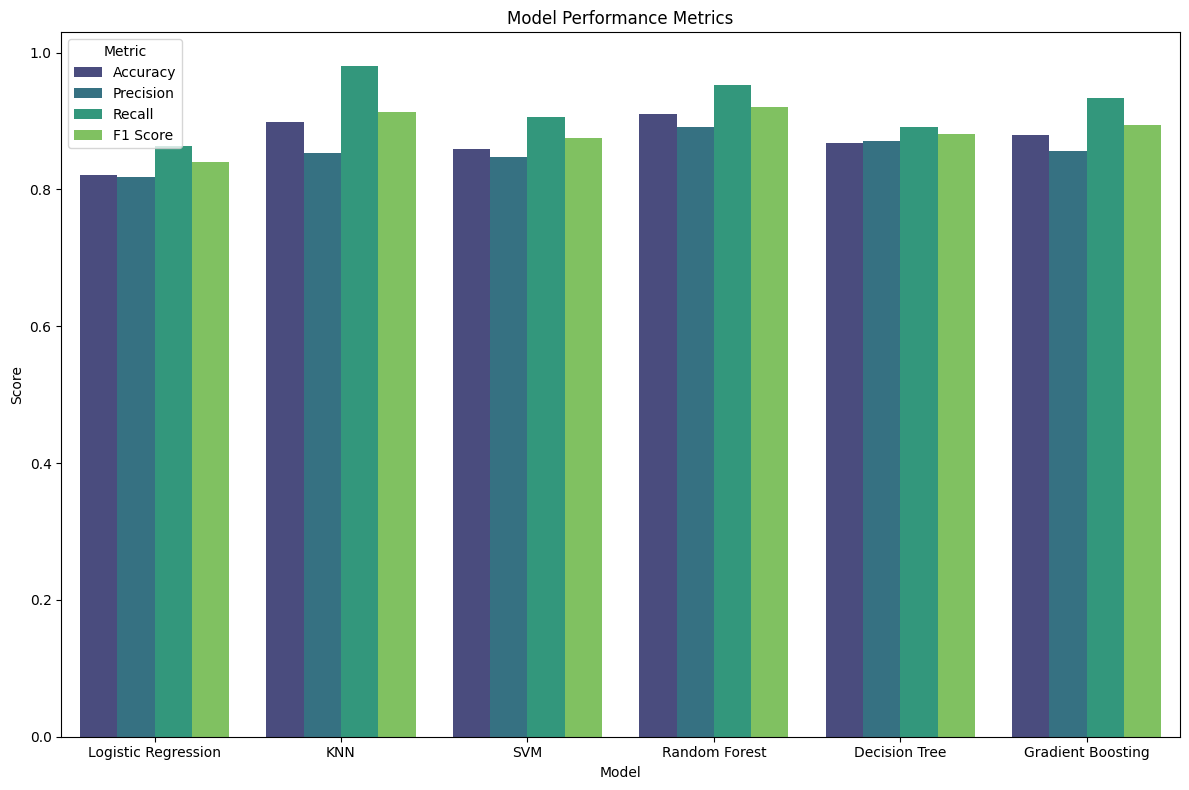

In [61]:
# Melt the DataFrame to a long format
final_data_melted = final_data.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=final_data_melted, x='Model', y='Score', hue='Metric', palette='viridis')
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## save the model

In [63]:
X = df.drop('quality', axis=1)
y = df['quality']

In [64]:
X_res , y_res = SMOTE().fit_resample(X, y)

In [65]:
X = sc.fit_transform(X_res)

In [66]:
X = pca.fit_transform(X)

In [67]:
rfc.fit(X, y_res)

RandomForestClassifier()

In [70]:
joblib.dump(rfc, 'joblib/wine_quality_pred_joblib')

['joblib/wine_quality_pred_joblib']

In [72]:
model = joblib.load('joblib/wine_quality_pred_joblib')

In [108]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [106]:
df_pre = df.iloc[16]
df_pre = pd.DataFrame(df_pre)
df_pre = df_pre.drop(df_pre.index[-1])
df_pre = df_pre.T
test = pca.transform(sc.transform(df_pre))
p = model.predict(test)
p

array([0], dtype=int64)

array([1], dtype=int64)